 **Atividade 3.2 - Hamilton Celerino da Fonseca Neto**

#Import e Dataset


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision


In [ ]:
!git clone https://github.com/vcasadei/MNIST.git
!ls MNIST

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (2/2), done.
processed  raw


In [ ]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras:", x_train.size(0))
print("Formato imagens:", x_train.size())
print("Min/max:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))


Amostras: 60000
Formato imagens: torch.Size([60000, 28, 28])
Min/max: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


# Normalização

In [ ]:
x_train = x_train.float() / 255.0

n_samples = 1000
x_train = x_train[:n_samples]
y_train = y_train[:n_samples]

print(x_train.shape, y_train.shape)
print(torch.min(x_train), torch.max(x_train))


torch.Size([1000, 28, 28]) torch.Size([1000])
tensor(0.) tensor(1.)


#Visualização de Imagens

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

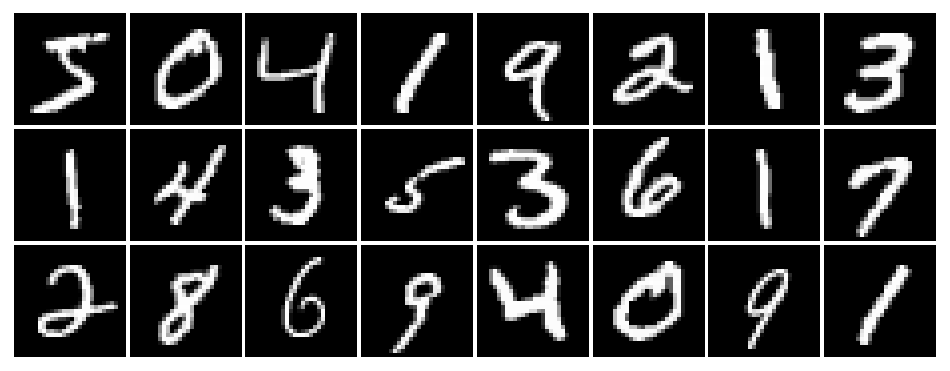

In [ ]:
grid = torchvision.utils.make_grid(
    x_train[:24].unsqueeze(1), padding=1, pad_value=1.0
)

plt.figure(figsize=(12,8))
plt.imshow(grid.numpy().transpose(1,2,0))
plt.axis("off")


Classe: tensor(5)


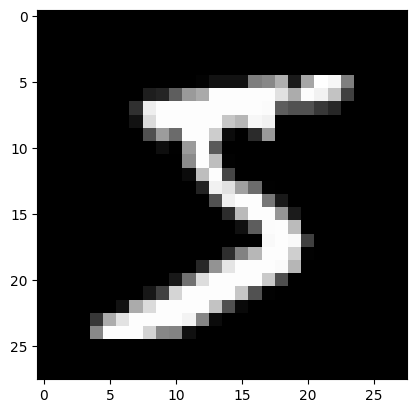

In [ ]:
plt.imshow(x_train[0].numpy(), cmap="gray")
print("Classe:", y_train[0])

# Modelo Softmax e Teste Predict

In [ ]:
model = nn.Linear(28*28, 10)  # 784 → 10
model


Linear(in_features=784, out_features=10, bias=True)

In [ ]:
xin = x_train[:5].view(-1, 28*28)
scores = model(xin)

prob, y_pred = torch.max(F.softmax(scores, dim=1), dim=1)
print("Pred:", y_pred)
print("Prob:", prob)


Pred: tensor([4, 8, 8, 4, 8])
Prob: tensor([0.1317, 0.1616, 0.1249, 0.1345, 0.1525], grad_fn=<MaxBackward0>)


#Treinamento

In [ ]:
epochs = 100
learning_rate = 0.5

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
losses = []
zs = []

for epoch in range(epochs):

    inputs = x_train.view(-1, 28*28)
    outputs = model(inputs)

    zs.append(outputs[1].detach().numpy())

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predictions = torch.max(outputs, 1)
    accuracy = (predictions.numpy() == y_train.numpy()).mean()

    # Atividade 1:
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.6f} - Acc: {accuracy:.6f}")


    # Atividade 2:

    print("Gradiente W[4][:10] =", model.weight.grad[4][:10].detach().numpy())
    print("Gradiente b[4] =", model.bias.grad[4].item())
    print("-"*50)


Epoch [1/100] - Loss: 2.297091 - Acc: 0.081000
Gradiente W[4][:10] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradiente b[4] = 0.009412922896444798
--------------------------------------------------
Epoch [2/100] - Loss: 1.797716 - Acc: 0.632000
Gradiente W[4][:10] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradiente b[4] = -0.02378910966217518
--------------------------------------------------
Epoch [3/100] - Loss: 1.460502 - Acc: 0.749000
Gradiente W[4][:10] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradiente b[4] = 0.003376007778570056
--------------------------------------------------
Epoch [4/100] - Loss: 1.242762 - Acc: 0.778000
Gradiente W[4][:10] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradiente b[4] = -0.016150135546922684
--------------------------------------------------
Epoch [5/100] - Loss: 1.093407 - Acc: 0.801000
Gradiente W[4][:10] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradiente b[4] = -0.00016030296683311462
--------------------------------------------------
Epoch [6/100] - Loss: 0.986542 - Acc: 0.816000

# Plot Perda

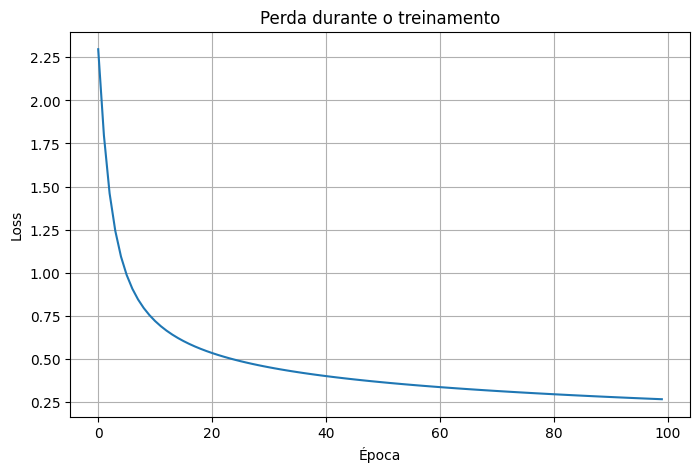

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Avaliação

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, preds = torch.max(outputs, 1)
    return preds.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print("Acurácia final:", accuracy)


Acurácia final: 0.943


# Matriz Confusão

In [ ]:
pd.crosstab(y_pred.numpy(), y_train.numpy())


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,111,1,0,0,0,2,2,1,0
2,0,0,91,1,0,1,0,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,1,2,0,3
5,0,2,0,1,0,81,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,2,0,0,83,0
